In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [4]:
whale_returns_path = Path("../Pandas_Portfolio_Analysis/Resources/whale_returns.csv")
sp500_history_path = Path("../Pandas_Portfolio_Analysis/Resources/sp500_history.csv")
goog_history_path = Path("../Pandas_Portfolio_Analysis/Resources/goog_historical.csv")
cost_history_path = Path("../Pandas_Portfolio_Analysis/Resources/cost_historical.csv")
algo_returns_path = Path("../Pandas_Portfolio_Analysis/Resources/algo_returns.csv")
aapl_history_path = Path("../Pandas_Portfolio_Analysis/Resources/aapl_historical.csv")

In [5]:
whale_returns_df = pd.read_csv(whale_returns_path, parse_dates=True, infer_datetime_format=True)
sp500_history_df = pd.read_csv(sp500_history_path, parse_dates=True, infer_datetime_format=True)

In [6]:
whale_returns_df['Date'] = pd.to_datetime(whale_returns_df["Date"], dayfirst = True)
whale_returns_df.set_index(whale_returns_df['Date'], inplace=True)
whale_returns_df.drop(columns=['Date'],inplace=True)

In [7]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [40]:
whale_returns_df.dropna(inplace = True)

In [9]:
algo_returns_df= pd.read_csv(algo_returns_path, parse_dates=True, infer_datetime_format=True)

In [10]:
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df["Date"], dayfirst = True)
algo_returns_df.set_index(algo_returns_df['Date'], inplace=True)
algo_returns_df.drop(columns=['Date'],inplace=True)

In [11]:
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [12]:
algo_returns_df.dropna(inplace = True)

In [13]:
sp500_history_df = pd.read_csv(sp500_history_path, parse_dates=True, infer_datetime_format=True)

In [14]:
sp500_history_df['Date'] = pd.to_datetime(sp500_history_df["Date"], dayfirst = True)
sp500_history_df.set_index(sp500_history_df['Date'], inplace=True)
sp500_history_df.drop(columns=['Date'],inplace=True)
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df = sp500_history_df.sort_values("Date", ascending=True)

In [15]:
sp500_history_df.dtypes

Close    object
dtype: object

In [16]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [17]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [18]:
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [19]:
sp500_returns_df.dropna(inplace = True)
sp500_returns_df

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [20]:
sp500_returns_df = sp500_returns_df.rename(columns= {'Close' : 'S&P500'})

In [21]:
whale_algo_sp500 = pd.concat([whale_returns_df,sp500_returns_df,algo_returns_df], axis='columns', join='inner')
whale_algo_sp500 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.004389,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.001196,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003944,-0.005447,0.001303
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.000509,-0.006945,0.002899
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.002274,-0.010301,-0.005228
2019-04-18,0.001448,0.001222,0.000582,0.001916,0.001579,-0.000588,-0.001229


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

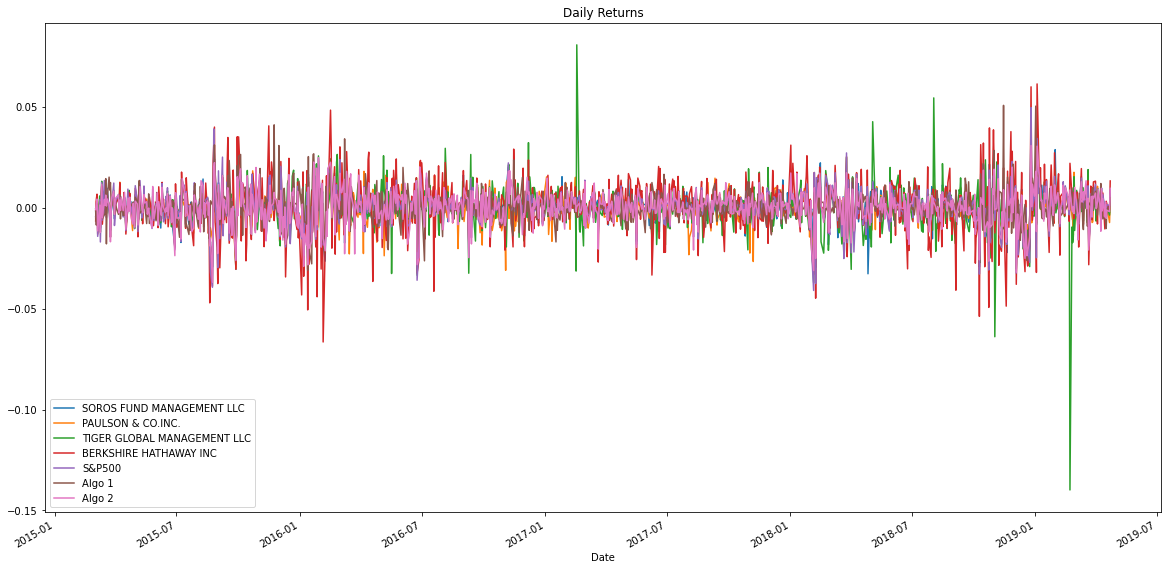

In [22]:
whale_algo_sp500.plot(title = 'Daily Returns', figsize = (20,10) )

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

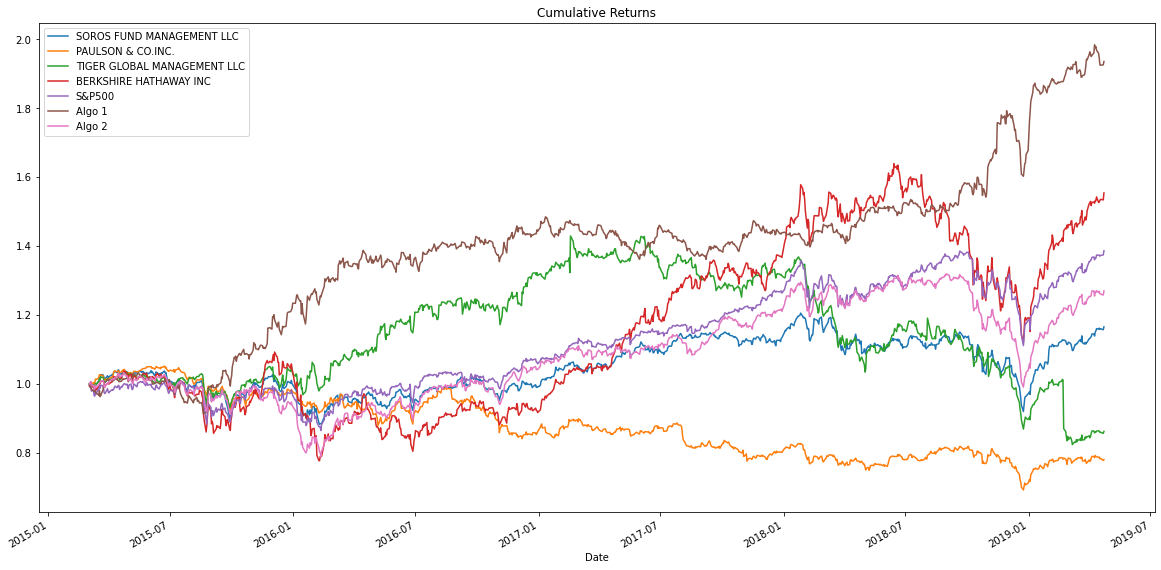

In [23]:
whale_algo_sp500_cumulative_returns = (1 + whale_algo_sp500).cumprod()
whale_algo_sp500_cumulative_returns.plot(title = 'Cumulative Returns', figsize = (20,10) )

<AxesSubplot:title={'center':'Portfolio Risk'}>

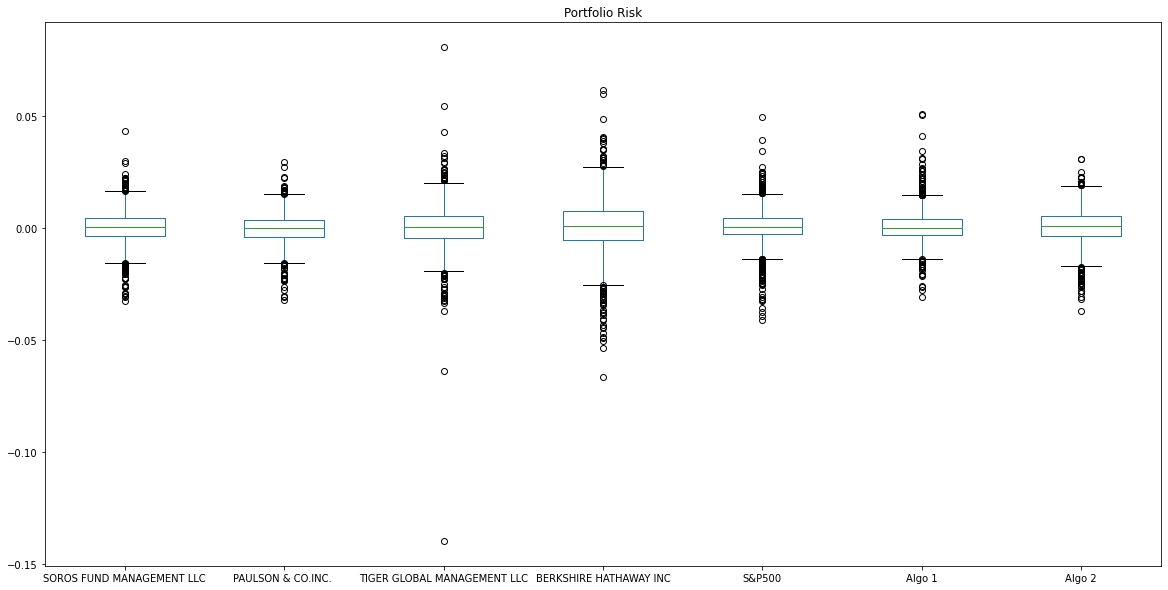

In [24]:
whale_algo_sp500.plot.box(title = 'Portfolio Risk', figsize = (20,10))

In [25]:
whale_algo_sp500_std = whale_algo_sp500.std()
whale_algo_sp500_std 

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
S&P500                         0.008554
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

In [26]:
riskier_than_sp500_df = (whale_algo_sp500_std > whale_algo_sp500_std['S&P500']).sort_values(ascending = False)
riskier_than_sp500_df 

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
Algo 2                         False
Algo 1                         False
S&P500                         False
PAULSON & CO.INC.              False
SOROS FUND MANAGEMENT LLC      False
dtype: bool

In [27]:
annual_std = whale_algo_sp500_std *np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
S&P500                         0.135786
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64

<AxesSubplot:title={'center':'Rolling 21 Day Standard Deviation'}, xlabel='Date'>

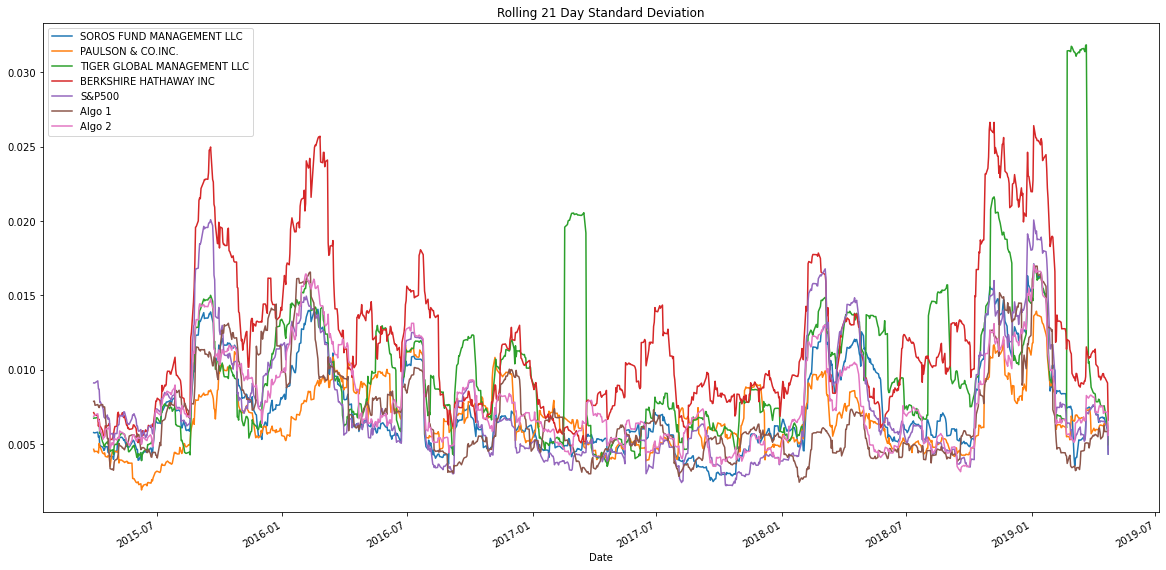

In [28]:
whale_algo_sp500.rolling(window = 21).std().plot(title = "Rolling 21 Day Standard Deviation", figsize =(20,10))

In [29]:
correlation = whale_algo_sp500.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.837864,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.669732,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.623946,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.751371,0.292033,0.688082
S&P500,0.837864,0.669732,0.623946,0.751371,1.000000,0.279494,0.858764
Algo 1,0.321211,0.268840,0.164387,0.292033,0.279494,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.858764,0.288243,1.000000


<AxesSubplot:>

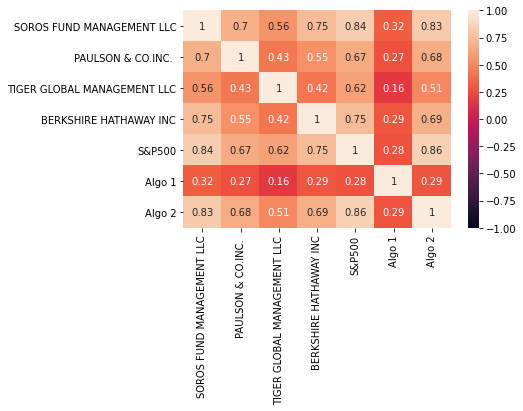

In [30]:
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True)

In [31]:
algo_SP500_covariance = whale_algo_sp500['Algo 2'].rolling(window=60).cov(whale_algo_sp500['S&P500'])
algo_SP500_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000038
2019-04-17    0.000034
2019-04-18    0.000035
2019-04-22    0.000035
2019-04-23    0.000035
Length: 1043, dtype: float64

In [32]:
algo_SP500_variance = whale_algo_sp500['S&P500'].rolling(window=60).var()
algo_SP500_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P500, Length: 1043, dtype: float64

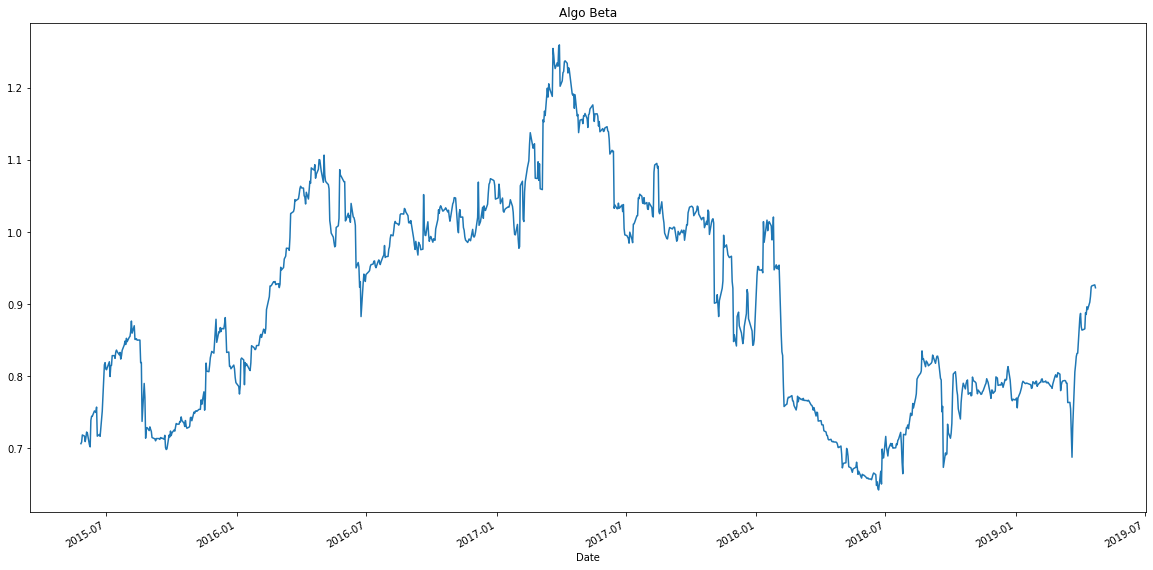

In [33]:
algo_beta = algo_SP500_covariance / algo_SP500_variance
algo_beta_plot = algo_beta.plot(title="Algo Beta", figsize=(20, 10))

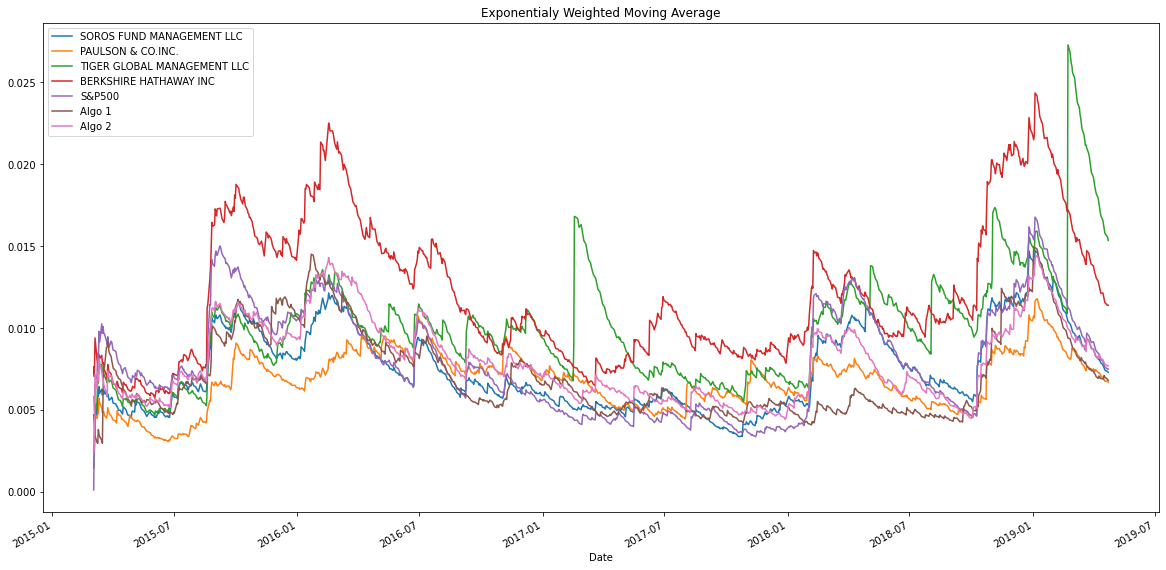

In [36]:
rolling_ewma = whale_algo_sp500.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Moving Average", figsize=(20, 10))

In [37]:
sharpe_ratio = (whale_algo_sp500.mean() * 252) / (whale_algo_sp500.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
S&P500                         0.648267
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

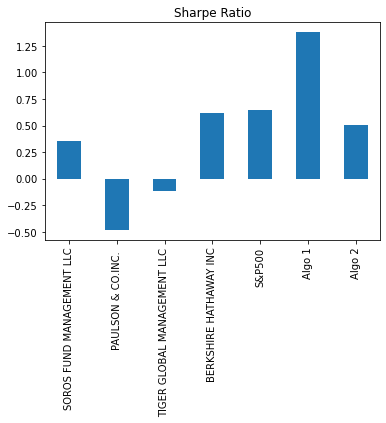

In [38]:
sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratio")

In [41]:
#Algo 1 outperforms all portfolios and Algo 2 outperforms 3 of the 4 Whales positions but underperforms Berkshire and S&P500